#Dependencies

In [124]:
import sys

sys.path.append('../data')
sys.path.append('..')
sys.path.append('../inference')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ai_trainer import Personal_Trainer
import squat_separation as ss
import pickle
import os
import random as rnd
from collections import defaultdict
import classification
import utils as ut


%matplotlib 

Using matplotlib backend: MacOSX


#Step1: Initialize Personal Trainer

In [125]:
#=====[ Initialize our personal trainer ]=====
a =2
pt = Personal_Trainer('NeckY')

try:
    #=====[ Load Squats ]======
    pt.load_squats(os.path.join('../data/data_sets','multipleClass4.p'))
    ut.print_success('Training data loaded')
    try:
        #=====[ Rehydrate classifiers ]=====
        classifiers = pickle.load(open(os.path.join('../inference/','trained_classifiers2.p'),'rb'))
        pt.set_classifiers(classifiers)
        ut.print_success('Classifiers trained')
    except Exception as e:
        ut.print_failure('Could not train classifiers' + str(e))
except Exception as e:
    ut.print_failure('Could not load training data:' + str(e))

[SUCCESS] ---------- > Training data loaded
[SUCCESS] ---------- > Classifiers trained


#Step2: Analyze Squats

'NoneType' object has no attribute '__getitem__' stance_width
'NoneType' object has no attribute '__getitem__' back_hip_angle
'NoneType' object has no attribute '__getitem__' bend_hips_knees
'NoneType' object has no attribute '__getitem__' squat_depth
'NoneType' object has no attribute '__getitem__' knees_over_toes
'NoneType' object has no attribute '__getitem__' head_alignment
'NoneType' object has no attribute '__getitem__' stance_width
'NoneType' object has no attribute '__getitem__' back_hip_angle
'NoneType' object has no attribute '__getitem__' bend_hips_knees
'NoneType' object has no attribute '__getitem__' squat_depth
'NoneType' object has no attribute '__getitem__' knees_over_toes
'NoneType' object has no attribute '__getitem__' head_alignment
'NoneType' object has no attribute '__getitem__' stance_width
'NoneType' object has no attribute '__getitem__' back_hip_angle
'NoneType' object has no attribute '__getitem__' bend_hips_knees
'NoneType' object has no attribute '__getitem__

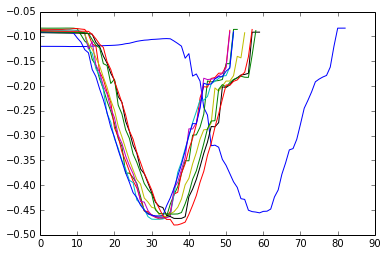

In [126]:
#=====[ Analyze squat data to pull out normalized, spliced reps ]=====
squats = pt.analyze_squats('../squatData13.txt')

for squat in squats:
    plt.plot(-squat['NeckY'])
    
#=====[ Extract feature vectors from squats for each exercise componenet  ]=====
feature_vectors = pt.get_prediction_features(squats)

results = {}
#=====[ Run classification on each squat component and report results  ]=====
for key in feature_vectors:
    X = feature_vectors[key]
    classification = pt.classify(key, X)
    results[key] = classification

#Step3 :Provide Feedback!

In [127]:
generate_advice(results)

I was able to analyze 10 of your squats!

Pretty solid job on your squats.

One smaller peice of advice: When you go into your squat, ensure that you are simultaneously bending your hips and knees


#Advice Generation

In [78]:
def generate_advice(results):
    advice = {'stance_width': 'Make sure you keep your feet shoulder width apart and aligned under your shoulders',
    'knees_over_toes':'Try your best to keep your knees behind your toes as you go down into your squat',
    'bend_hips_knees':'When you go into your squat, ensure that you are simultaneously bending your hips and knees',
    'back_straight':'Your back, from the base of your spine to your neck should be 180 degrees! Try to keep that steady at all times.',
    'squat_depth':'Get lower! You need to sit parallel to the ground',
    'back_hip_angle':'Be sure to keep the your back angled 45 degrees to the normal perpendicular to the floor'}

    main_issue = {'stance_width':'your stance',
    'knees_over_toes':'your knee and toe alignment',
    'bend_hips_knees':'the simultaneous motion of your back and legs when you squat',
    'back_straight':'your posture',
    'squat_depth':'the depth of your squat',
    'back_hip_angle':'the angle between your back and hip'}

    initialized = False
    status = []
    for key in results:
        if key != None and results[key] != None:
            if not initialized:
                initialized = True
                print 'I was able to analyze ' + str(len(results[key])) +' of your squats!\n'
            count = 0
            for label in results[key]:
                if label != 0:
                    count +=1
            status.append((key, float(count)/len(results[key])))
    
    if status[0][1] < 0.3:
        print 'Pretty solid job on your squats.\n'
        print 'One smaller peice of advice:', advice[status[0][0]]
    else:
        print 'There are a few things you could work on. We will start from most problematic to least:\n\n'
    for state in status:
        if state[1] > 0.3:
            print advice[state[0]]